In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
df=pd.read_csv('Tennis.csv',index_col=0)

In [5]:
df.replace('Sunny',0,inplace=True)

In [6]:
df.replace('Overcast',1,inplace=True)

In [7]:
df.replace('Rain',2,inplace=True)

In [8]:
df.replace('High',1,inplace=True)

In [9]:
df.replace('Normal',0,inplace=True)

In [10]:
df.head(10)

,Outlook,Humidity,Play Tennis
Day,,,
D1,0,1,No
D2,0,1,No
D3,1,1,Yes
D4,2,1,Yes
D5,2,1,Yes
D6,2,0,No
D7,1,0,Yes
D8,0,1,No
D9,0,0,No


In [11]:
df.replace('Yes',1,inplace=True)
df.replace('No',0,inplace=True)

In [12]:
df.head(10)

,Outlook,Humidity,Play Tennis
Day,,,
D1,0,1,0
D2,0,1,0
D3,1,1,1
D4,2,1,1
D5,2,1,1
D6,2,0,0
D7,1,0,1
D8,0,1,0
D9,0,0,0


In [13]:
x=df.iloc[:,:2]
y=df.iloc[:,-1]
print(x)
#y.head()

     Outlook  Humidity
Day                   
D1         0         1
D2         0         1
D3         1         1
D4         2         1
D5         2         1
D6         2         0
D7         1         0
D8         0         1
D9         0         0
D10        2         0


In [14]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn import tree
#display tree
import pydotplus
from io import StringIO
from IPython.display import display,Image

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
print(x_train.shape,x_test.shape)

(8, 2) (2, 2)


In [18]:
print(y_train.shape,y_test.shape)

(8,) (2,)


In [31]:
dt=tree.DecisionTreeClassifier(criterion='entropy',random_state=0)

In [32]:
clf=dt.fit(x_train,y_train)

In [33]:
y_pred=clf.predict(x_test)

In [34]:
print(y_test)

Day
D3    1
D9    0
Name: Play Tennis, dtype: int64


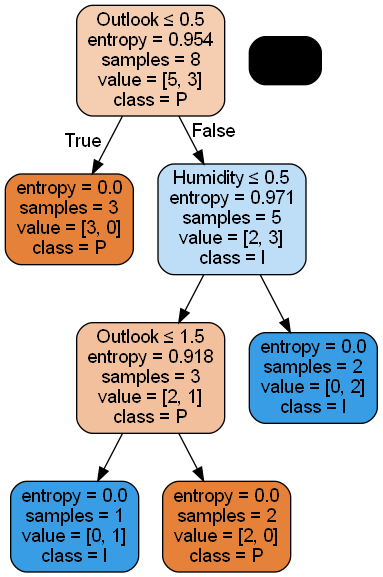

In [35]:
dotfilegraph=StringIO()   
dot_data = tree.export_graphviz(clf, out_file=dotfilegraph, 
                      feature_names=['Outlook','Humidity'],  
                      class_names='Play',  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = pydotplus.graph_from_dot_data(dotfilegraph.getvalue()) 
display(Image(graph.create_png()))

In [36]:
print("The accuracy of the Decision Tree classifier on training data is     {:.2f}".format(clf.score(x_train, y_train)))
print("The accuracy of the Decision Tree classifier on test data is     {:.2f}".format(clf.score(x_test, y_test)))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))  
print("\nClassiification Report:")
print(classification_report(y_test, y_pred))  

The accuracy of the Decision Tree classifier on training data is     1.00
The accuracy of the Decision Tree classifier on test data is     1.00

Confusion Matrix:
[[1 0]
 [0 1]]

Classiification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



[Text(0.4, 0.875, 'X[0] <= 0.5\nentropy = 0.954\nsamples = 8\nvalue = [5, 3]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.625, 'X[1] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.4, 0.375, 'X[0] <= 1.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

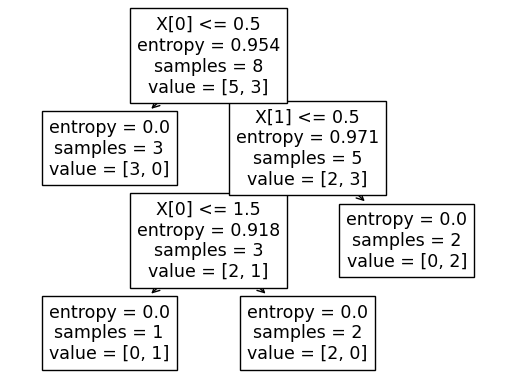

In [25]:
tree.plot_tree(clf)

In [26]:
pip install python-graphviz

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


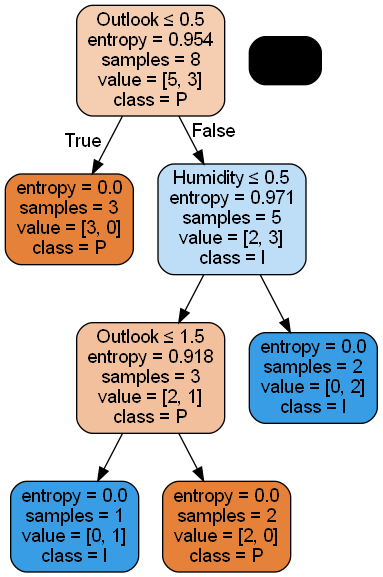

In [27]:
dotfilegraph=StringIO()   
dot_data = tree.export_graphviz(clf, out_file=dotfilegraph, 
                      feature_names=['Outlook','Humidity'],  
                      class_names='Play',  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = pydotplus.graph_from_dot_data(dotfilegraph.getvalue()) 
display(Image(graph.create_png()))